In [22]:
import pandas as pd
teams = pd.read_csv('data/clean/cleaned_teams.csv')
players = pd.read_csv('data/clean/cleaned_players.csv')
players_teams = pd.read_csv('data/clean/cleaned_players_teams.csv')
coaches = pd.read_csv('data/clean/cleaned_coaches.csv')

In [23]:
def calculate_coach_experience_for_team(coaches, team_id, year):
    team_coaches = coaches[(coaches['tmID'] == team_id) & (coaches['year'] == year)]
    total_games = team_coaches['won'].sum() + team_coaches['lost'].sum()
    
    total_coach_experience = 0
    
    for _, coach in team_coaches.iterrows():
        coach_history = coaches[(coaches['coachID'] == coach['coachID']) & (coaches['year'] < year)]
        coach_history = coach_history.sort_values(by='year', ascending=False).head(year)

        weights = list(range(year, 0, -1)) 
        weighted_winrate = sum(coach_history['winrate'] * weights[:len(coach_history)])
        total_awards = coach_history['TotalAwards'].sum()
        coach_experience = weighted_winrate + total_awards
        
        coach_games = coach['won'] + coach['lost']
        coach_weight = coach_games / total_games if total_games > 0 else 0
        total_coach_experience += coach_experience * coach_weight
    
    return total_coach_experience


In [24]:
def predict_team_year_stats(team_id, year): 
    # Select player ids for the team for that year
    players_ids = players_teams[(players_teams['tmID'] == team_id) & (players_teams['year'] == year)]['playerID']
    
    # Select player stats for last year
    team_players = players_teams[(players_teams['playerID'].isin(players_ids)) & (players_teams['year'] == year - 1)]
    team_players_bio = players[(players['bioID'].isin(players_ids))]

    print(teams.loc[(teams['tmID'] == team_id) & (teams['year'] == year)])
    
    # Copy the stats from the previous year into the new year    
    predicted_stats = teams.loc[(teams['tmID'] == team_id) & (teams['year'] == year - 1)].copy()
    predicted_stats['year'] = year
    
    # Calculate the player stats
    predicted_stats['player_average_height'] = team_players_bio['height'].mean()
    predicted_stats['player_average_weight'] = team_players_bio['weight'].mean()
    predicted_stats['player_total_GP'] = team_players['GP'].sum()
    predicted_stats['player_total_GS'] = team_players['GS'].sum()
    predicted_stats['player_total_points'] = team_players['points'].sum()
    predicted_stats['player_total_oRebounds'] = team_players['oRebounds'].sum()
    predicted_stats['player_total_dRebounds'] = team_players['dRebounds'].sum()
    predicted_stats['player_total_rebounds'] = team_players['rebounds'].sum()
    predicted_stats['player_total_assists'] = team_players['assists'].sum()
    predicted_stats['player_total_steals'] = team_players['steals'].sum()
    predicted_stats['player_total_blocks'] = team_players['blocks'].sum()
    predicted_stats['player_total_turnovers'] = team_players['turnovers'].sum()
    predicted_stats['player_total_PF'] = team_players['PF'].sum()
    predicted_stats['player_total_fgAttempted'] = team_players['fgAttempted'].sum()
    predicted_stats['player_total_fgMade'] = team_players['fgMade'].sum()
    predicted_stats['player_total_ftAttempted'] = team_players['ftAttempted'].sum()
    predicted_stats['player_total_ftMade'] = team_players['ftMade'].sum()
    predicted_stats['player_total_threeAttempted'] = team_players['threeAttempted'].sum()
    predicted_stats['player_total_threeMade'] = team_players['threeMade'].sum()
    predicted_stats['player_total_dq'] = team_players['dq'].sum()
    predicted_stats['player_total_PostGP'] = team_players['PostGP'].sum()
    predicted_stats['player_total_PostGS'] = team_players['PostGS'].sum()
    predicted_stats['player_total_PostMinutes'] = team_players['PostMinutes'].sum()
    predicted_stats['player_total_PostPoints'] = team_players['PostPoints'].sum()
    predicted_stats['player_total_PostoRebounds'] = team_players['PostoRebounds'].sum()
    predicted_stats['player_total_PostdRebounds'] = team_players['PostdRebounds'].sum()
    predicted_stats['player_total_PostRebounds'] = team_players['PostRebounds'].sum()
    predicted_stats['player_total_PostAssists'] = team_players['PostAssists'].sum()
    predicted_stats['player_total_PostSteals'] = team_players['PostSteals'].sum()
    predicted_stats['player_total_PostBlocks'] = team_players['PostBlocks'].sum()
    predicted_stats['player_total_PostTurnovers'] = team_players['PostTurnovers'].sum()
    predicted_stats['player_total_PostPF'] = team_players['PostPF'].sum()
    predicted_stats['player_total_PostfgAttempted'] = team_players['PostfgAttempted'].sum()
    predicted_stats['player_total_PostfgMade'] = team_players['PostfgMade'].sum()
    predicted_stats['player_total_PostftAttempted'] = team_players['PostftAttempted'].sum()
    predicted_stats['player_total_PostftMade'] = team_players['PostftMade'].sum()
    predicted_stats['player_total_PostthreeAttempted'] = team_players['PostthreeAttempted'].sum()
    predicted_stats['player_total_PostthreeMade'] = team_players['PostthreeMade'].sum()
    predicted_stats['player_total_PostDQ'] = team_players['PostDQ'].sum()
    predicted_stats['player_total_awards'] = team_players['TotalAwards'].sum()
    
    coach_experience = calculate_coach_experience_for_team(coaches, team_id, year)
    predicted_stats['coach_experience'] = coach_experience

    
    predicted_stats['playoff'] = ""
    predicted_stats['firstRound'] = ""
    predicted_stats['semis'] = ""
    predicted_stats['finals'] = ""
    
    return predicted_stats


# Function that returns a dataframe with all team stats for every year from 1 to year-1 plus the predicted stats for year
def get_year_predictions(year):
    team_predictions = []  # Use a list to collect rows
    for index, row in teams.iterrows():
        if row['year'] < year:
            team_predictions.append(
                teams.loc[(teams['tmID'] == row['tmID']) & (teams['year'] == row['year'])]
            )
        elif row['year'] == year:
            predicted_stats = predict_team_year_stats(row['tmID'], year)
            team_predictions.append(predicted_stats)
            
    return pd.concat(team_predictions, ignore_index=True)


# Get the predictions for year 10 and save them to data/clean/year_7_predictions.csv
year_10_predictions = get_year_predictions(10)


   year tmID franchID confID  rank playoff firstRound semis finals  o_fgm  \
1    10  ATL      ATL     EA     2       Y          L   NaN    NaN   1089   

   ...  player_total_PostTurnovers  player_total_PostPF  \
1  ...                        41.0                 45.0   

   player_total_PostfgAttempted  player_total_PostfgMade  \
1                         135.0                     58.0   

   player_total_PostftAttempted  player_total_PostftMade  \
1                          60.0                     40.0   

   player_total_PostthreeAttempted  player_total_PostthreeMade  \
1                             29.0                        12.0   

   player_total_PostDQ  player_total_awards  
1                  0.0                  1.0  

[1 rows x 105 columns]
    year tmID franchID confID  rank playoff firstRound semis finals  o_fgm  \
12    10  CHI      CHI     EA     5       N        NaN   NaN    NaN    930   

    ...  player_total_PostTurnovers  player_total_PostPF  \
12  ...           

In [25]:
#drop POST columns
print(year_10_predictions.shape)

year_10_predictions = year_10_predictions.drop(columns=year_10_predictions.columns[year_10_predictions.columns.str.contains('Post')])
teams = teams.drop(columns=teams.columns[teams.columns.str.contains('Post')])

print(year_10_predictions.shape)

(142, 105)
(142, 86)


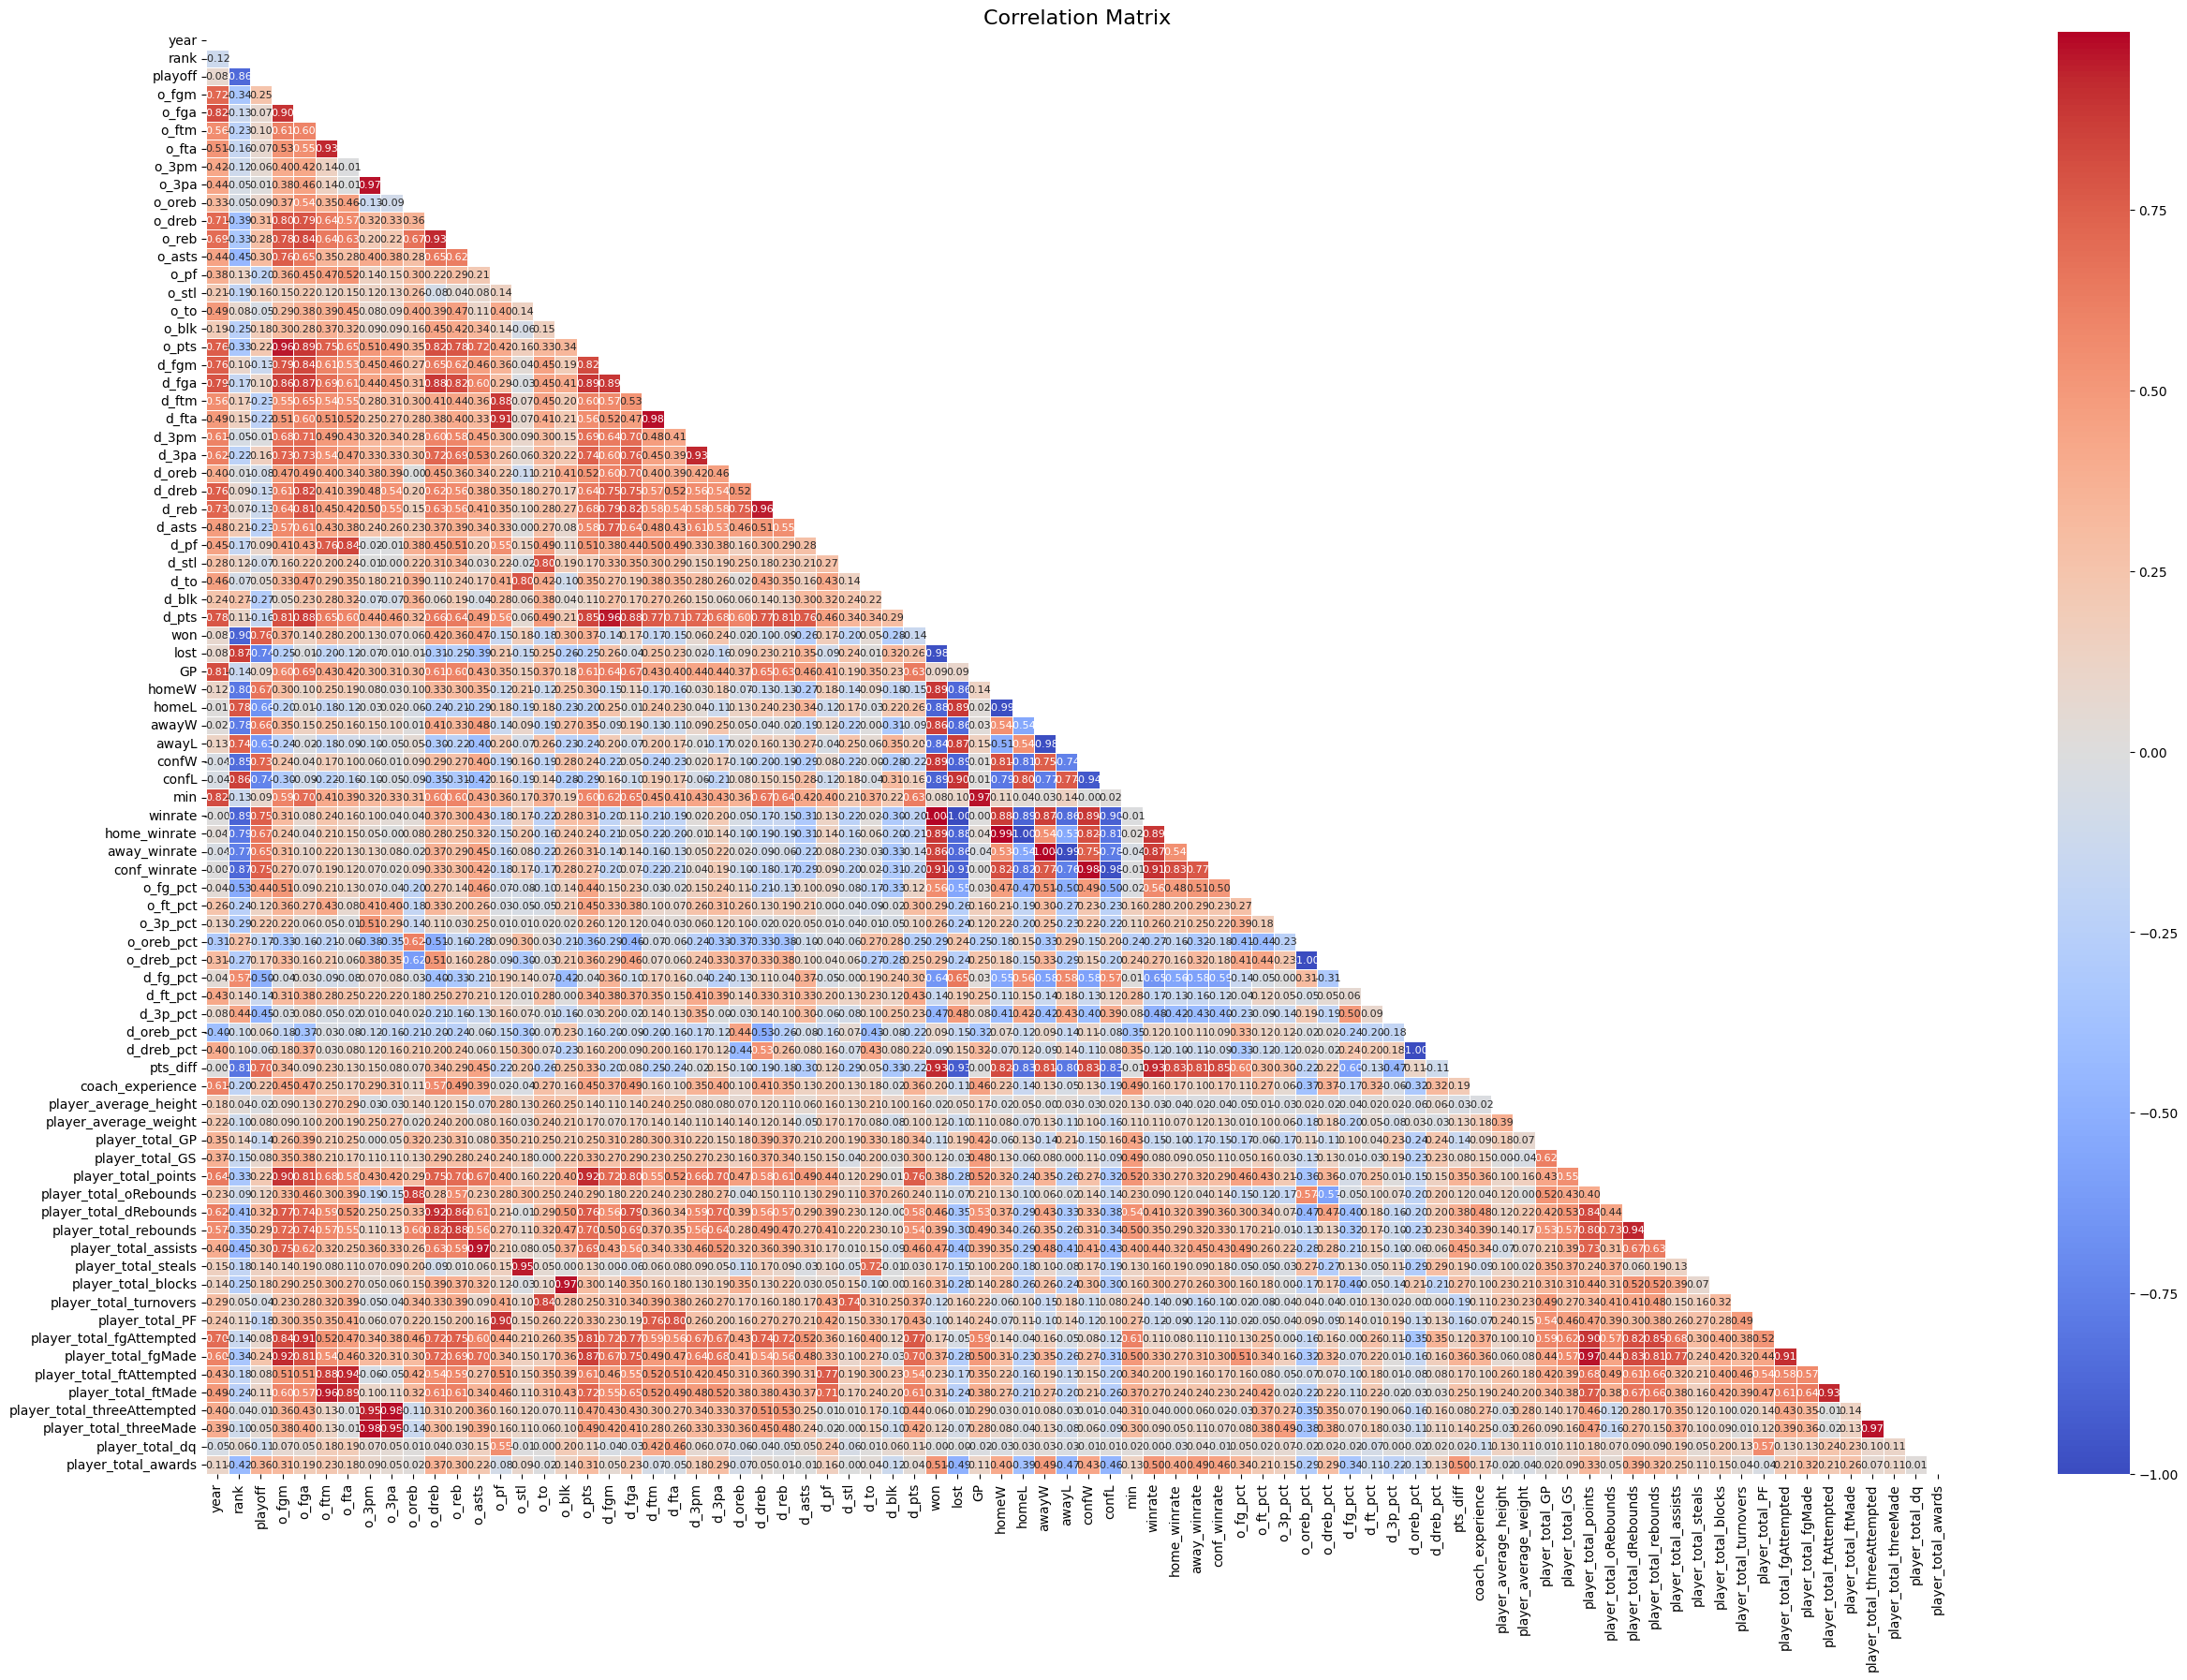

In [27]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def correlation_matrix(dataframe):
    if 'playoff' in dataframe.columns:
        dataframe['playoff'] = dataframe['playoff'].map({'Y': 1, 'N': 0})

    numeric_data = dataframe.select_dtypes(include=[np.number])
    
    corr_matrix = numeric_data.corr()

    if 'playoff' in corr_matrix.columns:
        target_correlation = corr_matrix['playoff']
    else:
        print("Coluna 'playoff' não encontrada.")
        return
    
    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

correlation_matrix(teams)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

train_data = year_10_predictions[year_10_predictions['year'] <= 9].dropna(subset=['playoff'])
X = train_data.drop(columns=['playoff', 'year', 'tmID', 'franchID', 'confID', 'firstRound', 'semis', 'finals', 'rank'])
y = train_data['playoff'] 

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

year_10_data = year_10_predictions[year_10_predictions['year'] == 10].drop(columns=['playoff', 'year', 'tmID', 'franchID', 'confID', 'firstRound', 'semis', 'finals', 'rank'])

predictions = model.predict(year_10_data)

year_10_predictions.loc[year_10_predictions['year'] == 10, 'playoff'] = predictions

real_values = teams[teams['year'] == 10]['playoff']

# Calculate the metrics
accuracy = accuracy_score(real_values, predictions)
precision = precision_score(real_values, predictions, pos_label='Y')  
recall = recall_score(real_values, predictions, pos_label='Y')
f1 = f1_score(real_values, predictions, pos_label='Y')

print("Model: Random Forest Classifier")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

print("\nClassification Report:")
print(classification_report(real_values, predictions, target_names=['N', 'Y']))

year_10_predictions.to_csv('data/clean/year_10_predictions.csv', index=False)


Model: Random Forest Classifier
Accuracy:  0.5384615384615384
Precision:  0.625
Recall:  0.625
F1 Score:  0.625

Classification Report:
              precision    recall  f1-score   support

           N       0.40      0.40      0.40         5
           Y       0.62      0.62      0.62         8

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13

